## Problem

Code the k-means clustering algorithm to cluster a set of points X into k clusters.

- **Input**: X, k
- **Output**: Cluster centers and point assignments

In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Example input
k = 3
X = np.concat(
    [
        np.random.normal(loc=1, scale=2, size=(30, 2)),
        np.random.normal(loc=6, scale=1, size=(30, 2)),
        np.random.normal(loc=12, scale=1, size=(20, 2)),
    ],
    axis=0,
)
np.random.shuffle(X)
print(X.shape)

(80, 2)


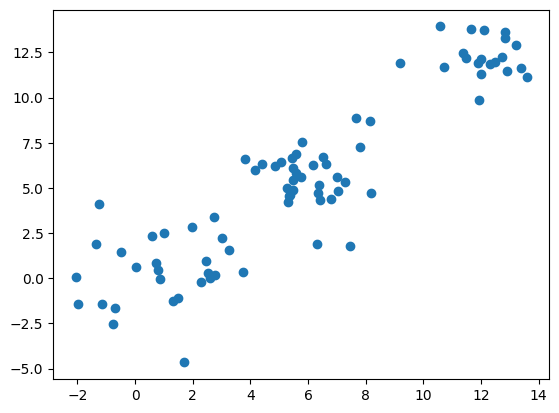

In [37]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Implementation/Solution

In [54]:
# K-means implementation
class KMeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def distance(self, x, centers):
        return np.sqrt(np.sum(np.square(centers - x), axis=1))

    def assign(self, x, centers):
        distances = self.distance(x, centers)
        return np.argmin(distances)

    def fit(self, X):
        centers = X[np.random.choice(list(range(X.shape[0])), self.k), :]
        for iter in range(self.max_iters):
            clusters = [[] for _ in range(self.k)]
            for i, x in enumerate(X):
                assignment = self.assign(x, centers)
                clusters[assignment].append(i)
            centers = [np.mean(X[indices], axis=0) for indices in clusters]
        self.centers = centers

    def predict(self, X):
        return [self.assign(x, self.centers) for x in X]

In [55]:
# Run clustering
clusterer = KMeans(k=k)
clusterer.fit(X)
clusters = clusterer.predict(X)

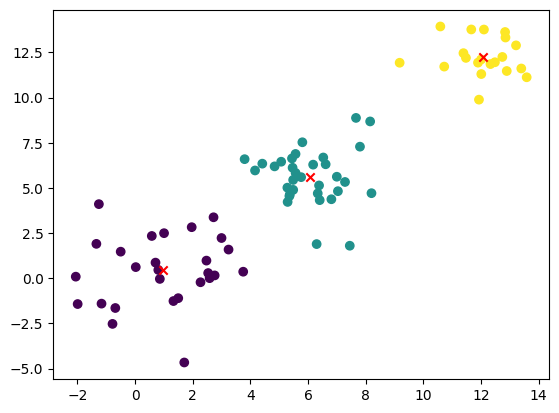

In [58]:
# Plot
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter([c[0] for c in clusterer.centers], [c[1] for c in clusterer.centers], marker='x', color='red')
plt.show() 